In [1]:
pip install qiskit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 18.8 MB/s eta 0:00:00


In [2]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=d0d86833f0058891c82f6a13009736e65cee697a3fe0278f01385df1d7c8dc63
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


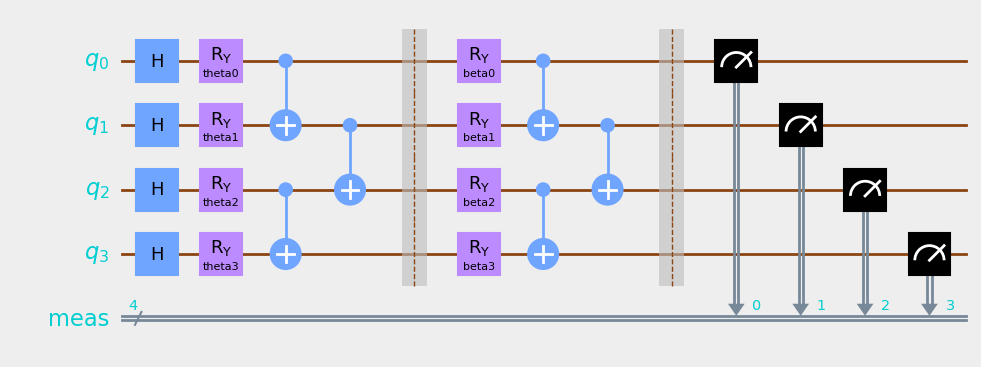

In [8]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter

# Define the number of qubits
n_qubits = 4

# Create the quantum circuit
qc = QuantumCircuit(n_qubits)

# Define the theta and beta parameters
# Define the theta and beta parameters as lists
theta = [Parameter(f'theta{i}') for i in range(n_qubits)]
beta = [Parameter(f'beta{i}') for i in range(2*n_qubits)]

# Apply Hadamard gates to all qubits for superposition
qc.h(range(n_qubits))

# Apply Ry gates with theta parameter to encode values
for i in range(n_qubits):
    qc.ry(theta[i], i)

# Apply CNOT gates for entanglement
qc.cx(0, 1)
qc.cx(2, 3)
qc.cx(1, 2)
qc.barrier()
# Apply Rx gates with beta parameter for depth
for i in range(n_qubits):
    qc.ry(beta[i], i)
qc.cx(0, 1)
qc.cx(2, 3)
qc.cx(1, 2)
qc.measure_all()
# Transpile the circuit
transpiled_circuit = transpile(qc, optimization_level=3)

# Print the transpiled circuit
#print(transpiled_circuit)
transpiled_circuit.draw(output='mpl', style={'backgroundcolor': '#EEEEEE', 'linecolor': '#8B4513', 'textcolor': '#00CED1'})